In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
%gui qt

In [4]:
from spiketag.mvc.Control import controller
from spiketag.probe import prb_bowtie_LL as prb

In [5]:
prb.fs =25000.
prb.n_ch = 160
prb.reorder_by_chip = True
prb._nchips = 5

In [6]:
ctrl = controller(fpga=True,
                  mua_filename='../mua.bin',
                  spk_filename='../spk.bin', 
                  spktag_filename='../spiketag/place_cell',
                  
                  probe=prb,
                  binary_radix=13,
                  cutoff=[-2650, 1000],
                  time_segs=[[0,1800]],
                  
                  playground_log='../process.log',
                  session_id=0,
                  v_cutoff=5,
                  behavior_start_time=2.1218)

2018-08-13 12:36:45,771 - spiketag - INFO - load spktag file
2018-08-13 12:36:47,567 - spiketag - INFO - load mua data for wave view
2018-08-13 12:36:47,699 - spiketag - INFO - #############  load data  ###################
2018-08-13 12:36:47,700 - spiketag - INFO - ../mua.bin loaded, it contains: 
2018-08-13 12:36:47,701 - spiketag - INFO - 46690656 * 160 points (29882019840 bytes) 
2018-08-13 12:36:47,703 - spiketag - INFO - 160 channels with sampling rate of 25000.0000 
2018-08-13 12:36:47,704 - spiketag - INFO - 1867.626 secs (31.127 mins) of data
2018-08-13 12:36:47,705 - spiketag - INFO - #############################################
2018-08-13 12:36:49,724 - spiketag - INFO - reordered with nchips=5 and nch_perchip=32
2018-08-13 12:36:51,607 - spiketag - INFO - processing folder: ../
2018-08-13 12:36:51,717 - spiketag - INFO - raw data have 2028495 spks
2018-08-13 12:36:51,718 - spiketag - INFO - ----------------success------------------
2018-08-13 12:36:51,720 - spiketag - INFO

In [28]:
ctrl.show()

(5, array([18, 48, 50, 63]))
(4, array([ 1,  8, 15, 51]))


In [57]:
ctrl.refine(0)

In [67]:
ctrl.build_vq(n_vq=[20,20,20,20,20])

In [60]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=1)
knn.fit(ctrl.points, ctrl
        .labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
for clu_id in range(ctrl.nclu):
    idx = np.where(ctrl.clu.membership==clu_id)[0]
    print '{}: {}'.format(clu_id, knn.score(ctrl.fet[idx][:,:4], ctrl.clu.membership[idx]))
    print idx.shape[0]

0: 0.979149873717
18609
1: 0.999062792877
1067
2: 0.988749172733
3022
3: 1.0
124


In [56]:
ctrl.current_group

20

(21, array([ 64,  95,  98, 111]))


In [62]:
ctrl.vq

{'labels': {4: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 4, 4, 4, 0, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4], dtype=int32),
  5: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1,
         0, 1, 0, 0, 1, 1, 1, 1, 1, 4, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32),
  20: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 4, 4, 0, 5, 4, 2, 4, 4, 8, 4, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 6, 6, 6, 6, 6,

(16, array([ 74, 117, 118, 124]))
(17, array([ 68,  76,  77, 122]))
(15, array([ 67,  69, 116, 123]))
(16, array([ 74, 117, 118, 124]))


In [68]:
vq = ctrl.vq

In [69]:
vq

{'labels': {4: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
         0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
         2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 0, 4, 4, 4,
         0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32),
  5: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1,
         0, 1, 0, 0, 1, 1, 1, 1, 1, 4, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32),
  20: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 4, 4, 0, 5, 4, 2, 4, 4, 8, 4, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 6, 6, 6, 6, 6,

In [64]:
!rm ./vq.npy

In [65]:
np.save('./vq.npy', vq)

In [23]:
%store vq

Stored 'vq' (dict)


In [70]:
ctrl.set_threshold()
ctrl.set_transformer()
ctrl.set_vq()

group 4 vq configured with shape (100, 4)
group 5 vq configured with shape (100, 4)
group 20 vq configured with shape (100, 4)
group 21 vq configured with shape (100, 4)
group 25 vq configured with shape (100, 4)
group 26 vq configured with shape (100, 4)


In [21]:
ctrl.fpga.vq[4]

array([[-0.1015625,  0.0390625,  0.09375  , -0.0625   ],
       [-0.0078125,  0.0078125,  0.0078125,  0.046875 ],
       [-0.0703125,  0.0078125, -0.0546875,  0.015625 ],
       [ 0.0234375, -0.0859375, -0.046875 ,  0.015625 ],
       [-0.0390625, -0.0234375,  0.       , -0.0234375],
       [-0.0234375,  0.0234375, -0.03125  ,  0.       ],
       [ 0.0078125,  0.0625   ,  0.0859375,  0.0234375],
       [-0.078125 ,  0.0234375, -0.0234375, -0.0234375],
       [ 0.       , -0.0546875, -0.0078125,  0.015625 ],
       [ 0.078125 , -0.046875 ,  0.0234375,  0.       ],
       [-0.0625   , -0.0859375,  0.       , -0.03125  ],
       [-0.046875 ,  0.03125  ,  0.015625 ,  0.0078125],
       [ 0.2734375,  0.1796875,  0.171875 , -0.0234375],
       [ 0.0234375, -0.0625   ,  0.0078125, -0.0390625],
       [-0.078125 ,  0.0859375,  0.1328125, -0.078125 ],
       [ 0.0234375, -0.0078125,  0.046875 , -0.0390625],
       [-0.03125  ,  0.046875 ,  0.046875 ,  0.0078125],
       [ 0.0625   ,  0.0078125,

In [40]:
ctrl.model.construct_kdtree(ctrl.current_group)

In [90]:
from spiketag.view import scatter_3d_view

In [91]:
sd_view = scatter_3d_view()

In [92]:
clu_id = 0
X = ctrl.model.fet[ctrl.current_group][ctrl.clu.index[0]]

In [93]:
sd_view.set_data(X)

In [95]:
sd_view.show()

In [97]:
clu = ctrl._predict(ctrl.fet[ctrl.clu.index[0]])

In [98]:
sd_view.set_data(X,clu)

In [14]:
ctrl.build_vq()

In [86]:
ctrl.model.kd

{<sklearn.neighbors.kd_tree.KDTree at 0x55d0c62bd820>: 4,
 <sklearn.neighbors.kd_tree.KDTree at 0x55d0ca88dd80>: 1,
 <sklearn.neighbors.kd_tree.KDTree at 0x55d0cb73bd90>: 3,
 <sklearn.neighbors.kd_tree.KDTree at 0x55d0cf3fbf80>: 0,
 <sklearn.neighbors.kd_tree.KDTree at 0x55d0d75e5e90>: 5,
 <sklearn.neighbors.kd_tree.KDTree at 0x55d0d8d09070>: 2}

In [15]:
ctrl.vq

{'labels': {4: array([1, 0, 4, 5, 0, 5, 0, 2, 0, 0, 4, 0, 0, 0, 6, 3, 5, 4, 5, 6, 6, 1,
         0, 6, 7, 0, 1, 7, 5, 2, 0, 4, 0, 3, 5, 4, 5, 5, 0, 3, 3, 4, 1, 7,
         6, 5, 7, 3, 7, 2, 0, 4, 5, 0, 4, 1, 0, 6, 4, 5, 5, 0, 7, 2, 6, 0,
         1, 3, 4, 6, 5, 4, 5, 6, 0, 6, 6, 0, 7, 6, 0, 5, 5, 0, 6, 1, 6, 4,
         6, 6, 4, 0, 1, 0, 6, 0, 7, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 

In [7]:
ctrl.model.mua.show(prb[4], time=2)

In [43]:
current_time = ctrl.model.mua.spk_times[ctrl.current_group][ctrl.view.spkview.selected_spk]/ctrl.model.mua.fs

AttributeError: 'spike_view' object has no attribute 'clu'

In [44]:
current_pts = ctrl.model.mua.spk_times[ctrl.current_group][ctrl.view.spkview.selected_spk][0]

AttributeError: 'spike_view' object has no attribute 'clu'

  File "/disk0/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/disk0/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/disk0/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/disk0/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/disk0/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback

In [104]:
ctrl.model.mua.data[current_pts, prb.chs].mean()

196.63712

In [677]:
noise_leve = []
group_id = ctrl.current_group
for i in range(ctrl.model.spk[group_id].shape[0]):
    current_pts = ctrl.model.mua.spk_times[group_id][i]
    noise_leve.append(ctrl.model.mua.data[current_pts, prb.chs].mean()/ctrl.model.mua.data[current_pts, prb[group_id]].mean())
noise_leve = np.array(noise_leve)

In [678]:
noise_leve.mean()

0.20933117

In [679]:
noise_leve.shape

(25686,)

In [680]:
np.median(abs(noise_leve))

0.18409492

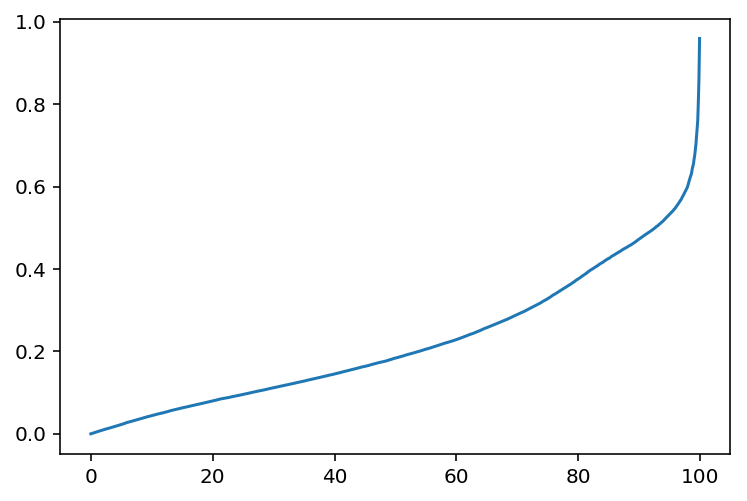

In [681]:
plot(np.arange(0,100,.1), np.percentile(abs(noise_leve), np.arange(0,100,.1)), '-')

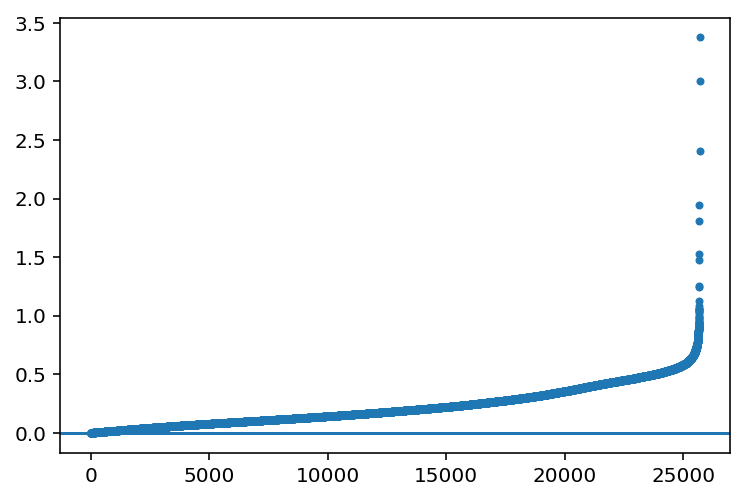

In [682]:
plot(np.sort(abs(noise_leve))[:-3],'.');
axhline()

In [683]:
idx = np.where(abs(noise_leve)>0.3)[0]

In [684]:
idx.shape

(7324,)

In [685]:
clut = ctrl.model.clu[ctrl.current_group]

In [686]:
clut.select(idx)

delete (7324,) spikes


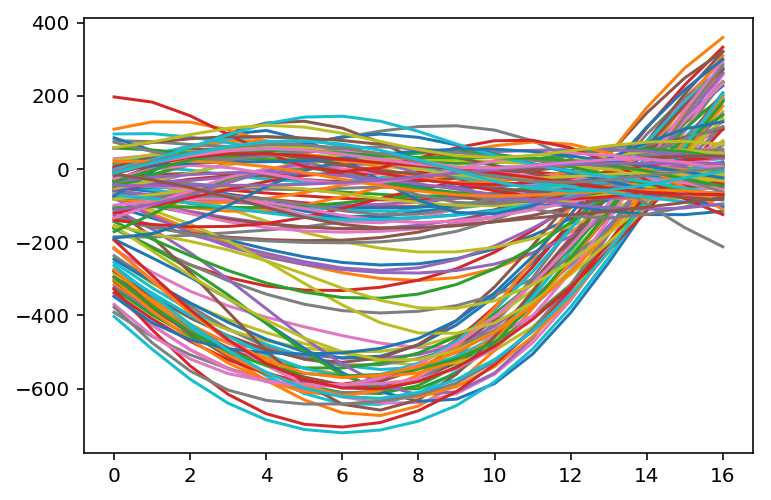

In [46]:
plot(ctrl.model.mua.data[current_pts-7:current_pts+10 , prb.chs]);

In [43]:
current_pts = ctrl.model.mua.spk_times[ctrl.current_group][ctrl.view.spkview.selected_spk][0]

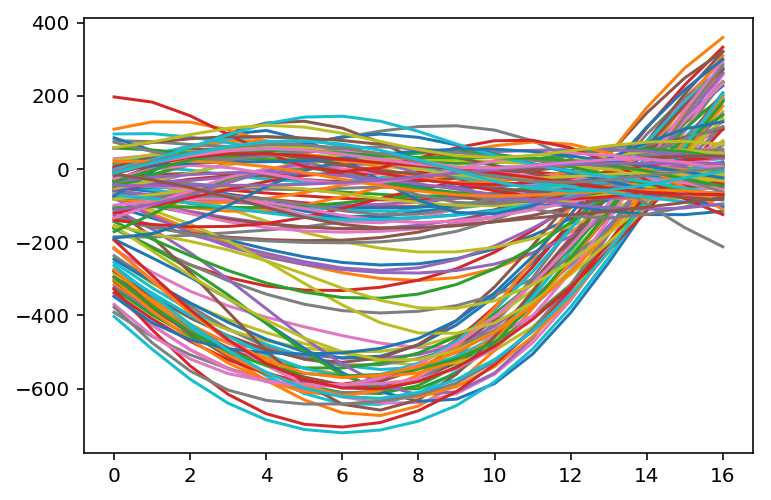

In [44]:
plot(ctrl.model.mua.data[current_pts-7:current_pts+10 , prb.chs]);

In [105]:
current_time

array([1156.66172])

In [114]:
ctrl.model.mua.show(prb.chs, time=current_time, span=2)

In [7]:
ctrl.show()

(4, array([ 1,  8, 15, 51]))


In [22]:
ctrl.replay(maze_folder = '/disk0/Work/pydev/playground/playground/base/maze/obj/', 
            neuron_id = [1,3])

('Origin:', array([130917.01, 125814.  ,     -0.  ], dtype=float32))


  File "/disk0/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/disk0/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/disk0/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/disk0/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/disk0/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback

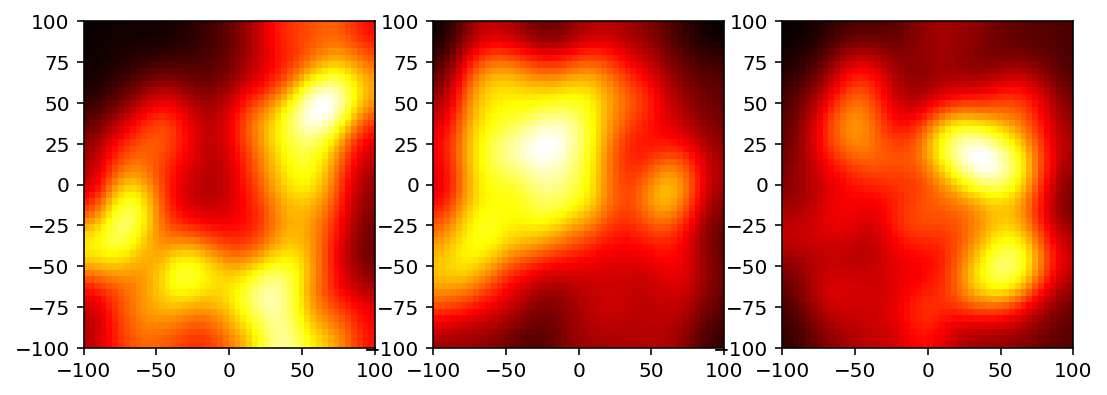

In [35]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

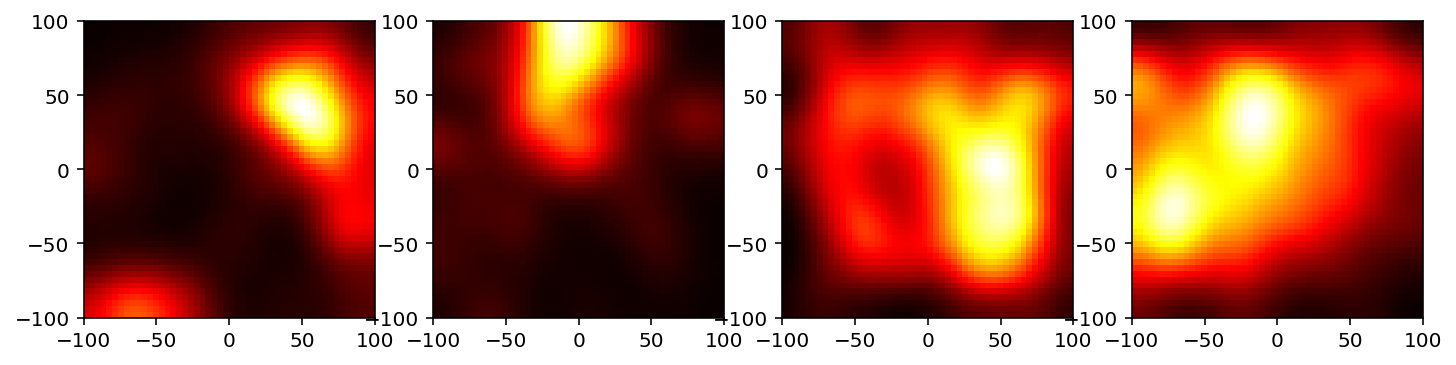

In [227]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

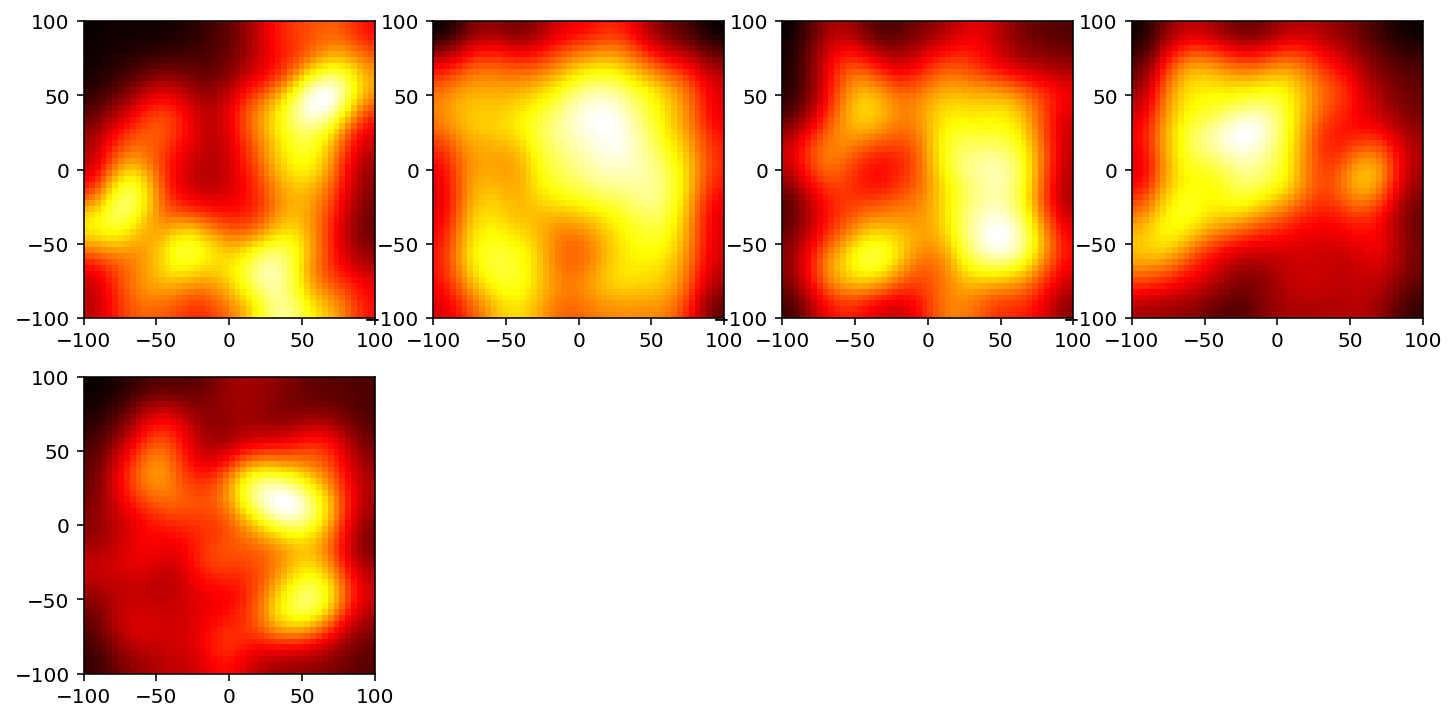

In [261]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

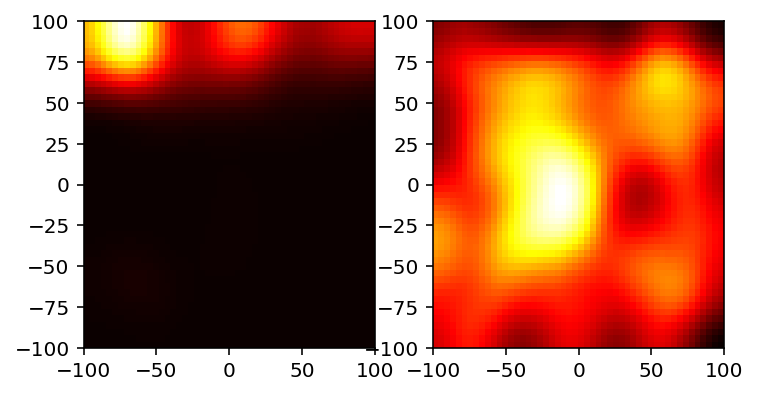

(12, array([ 7, 24, 27, 40]))


In [320]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

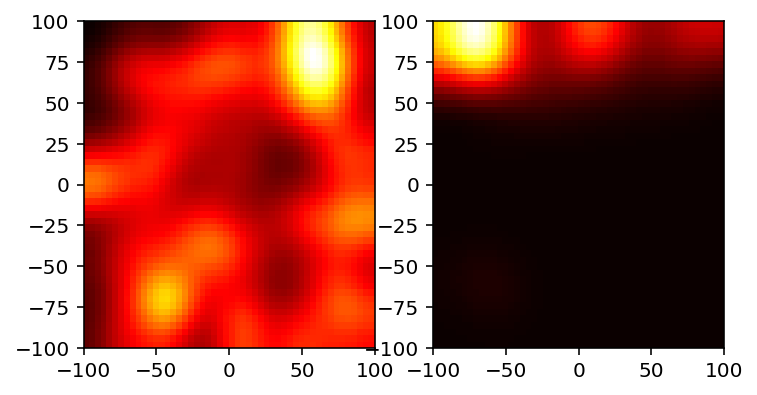

(24, array([ 83,  85, 101, 103]))


In [340]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

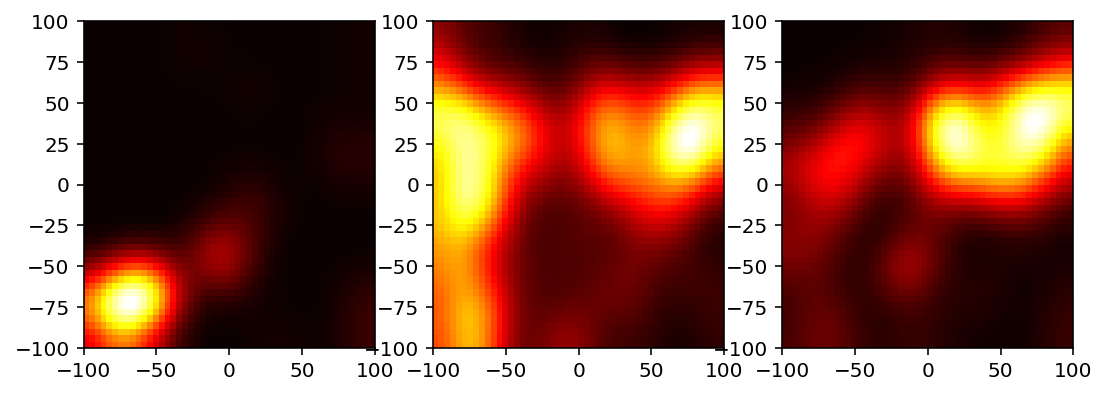

In [368]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

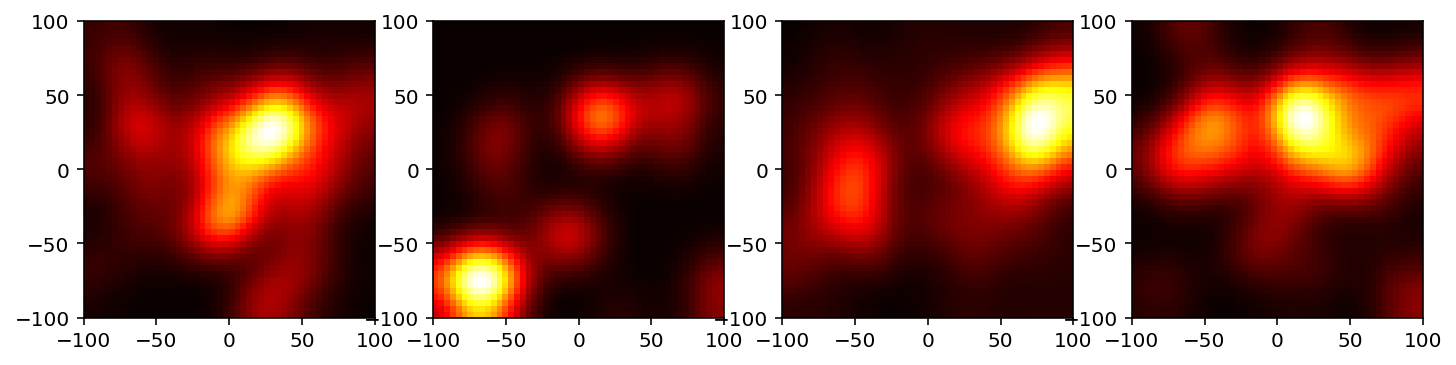

In [405]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

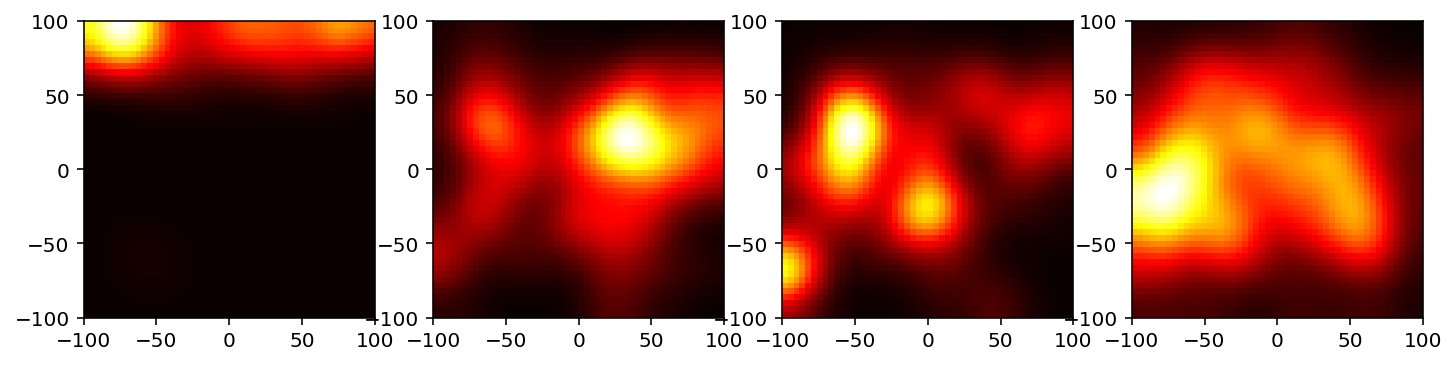

In [443]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

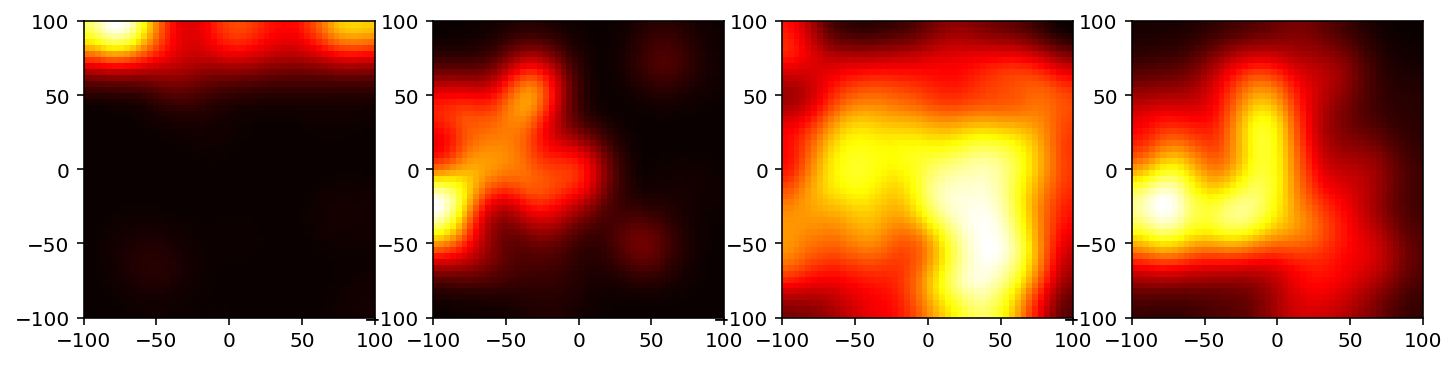

In [504]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

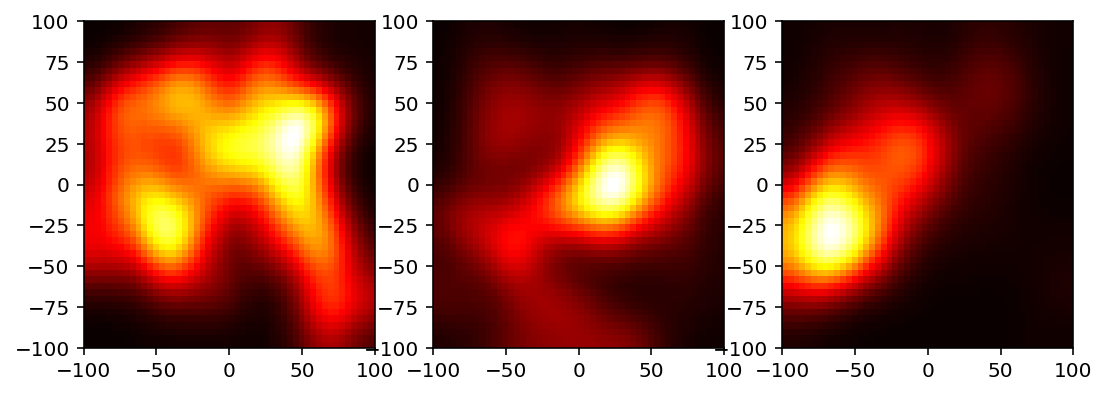

In [541]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

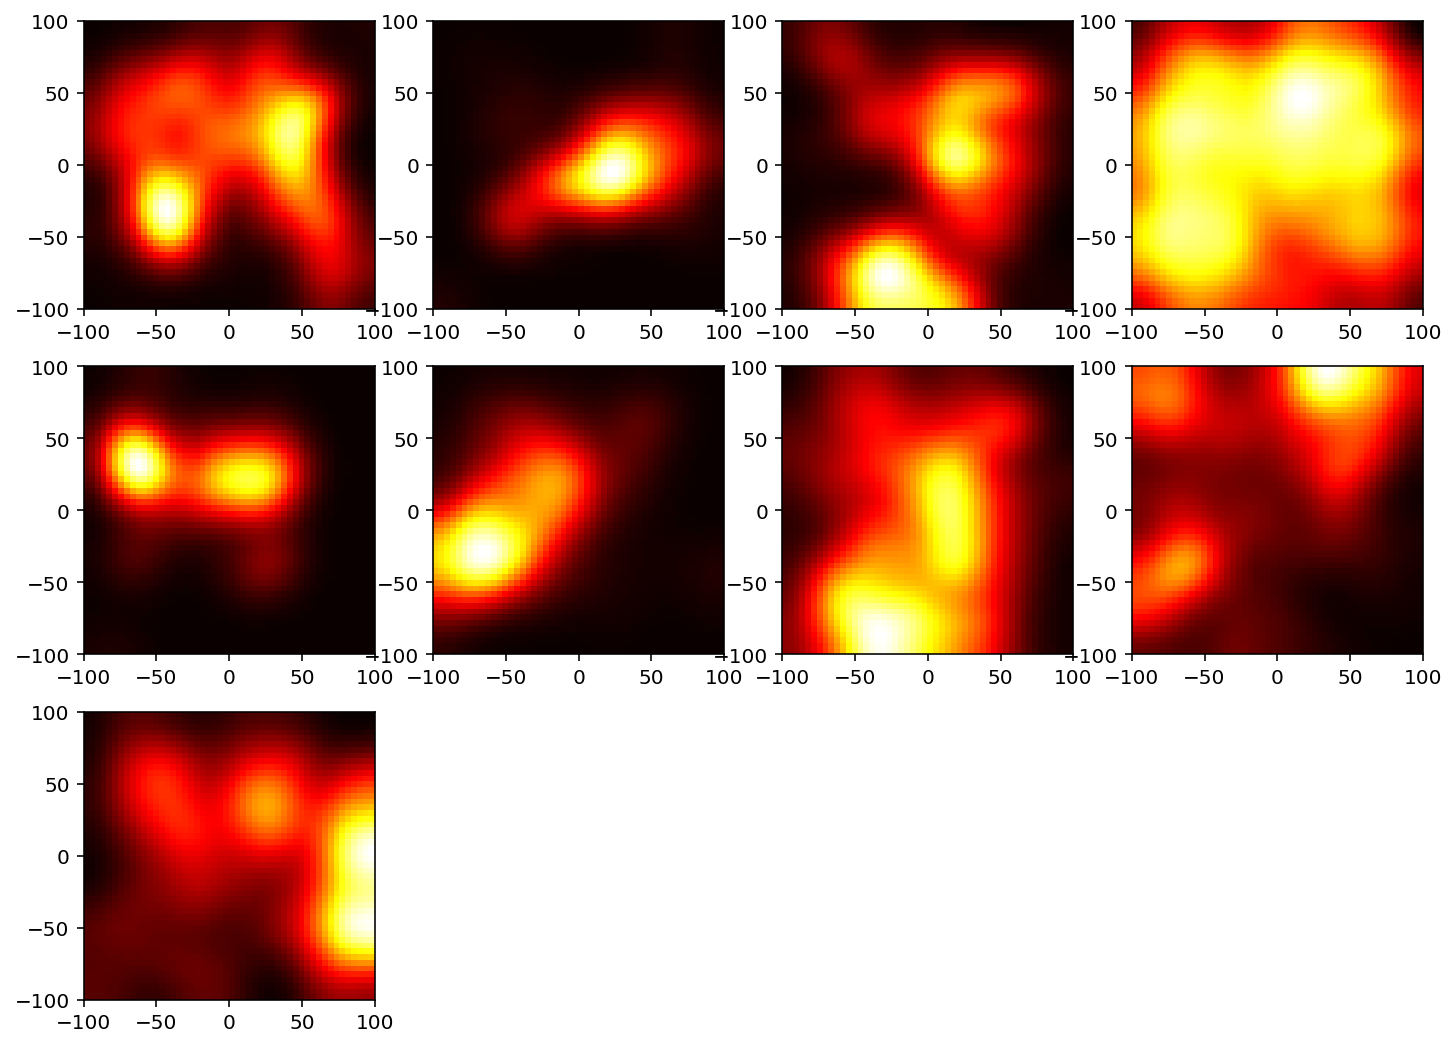

In [601]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

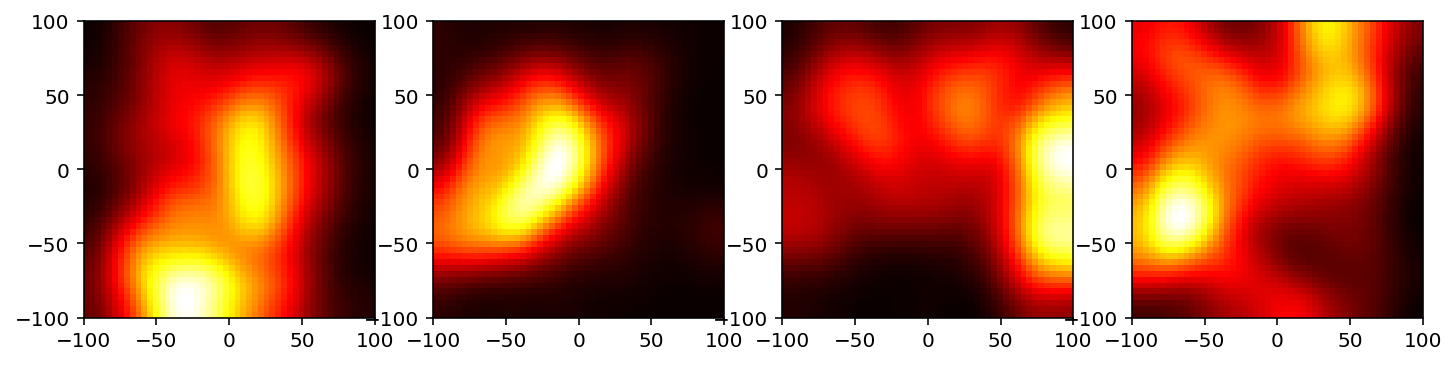

(22, array([ 73,  89,  97, 125]))


In [625]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

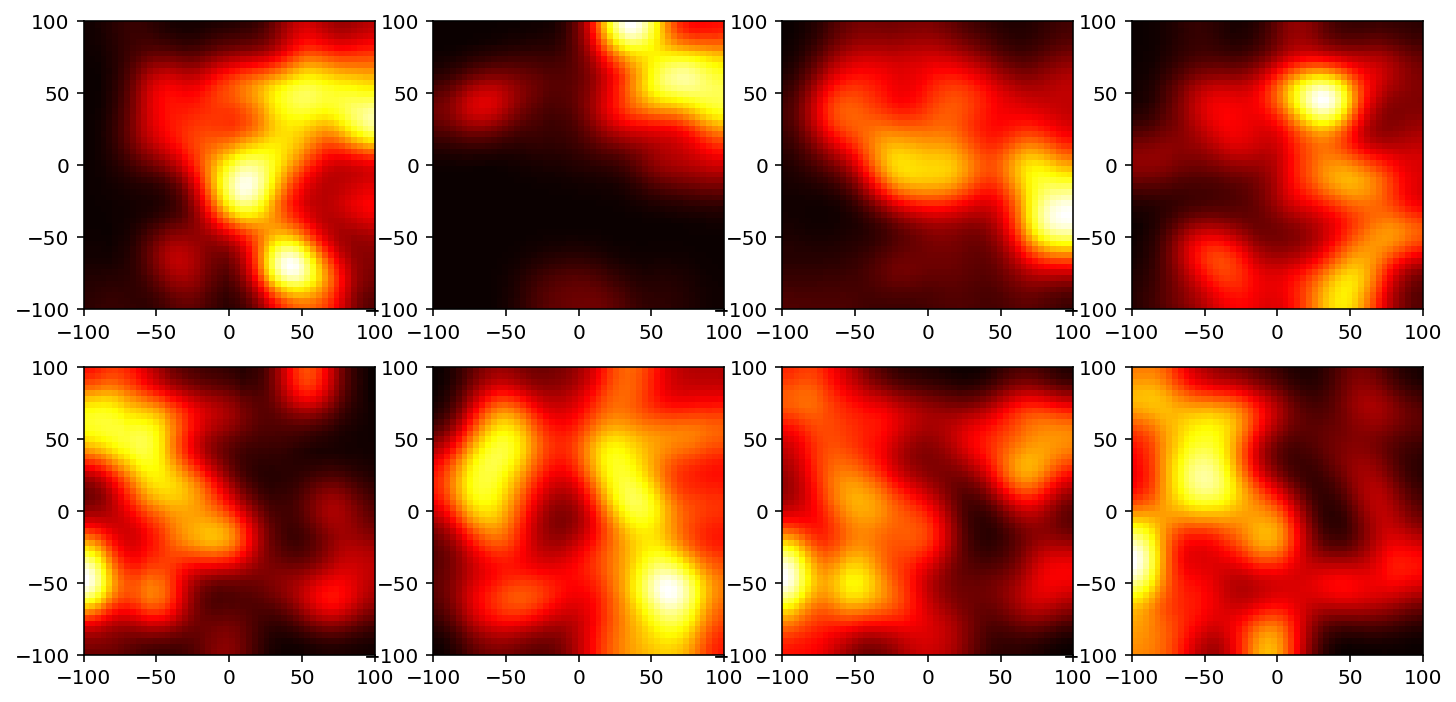

(17, array([ 68,  76,  77, 122]))


In [674]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

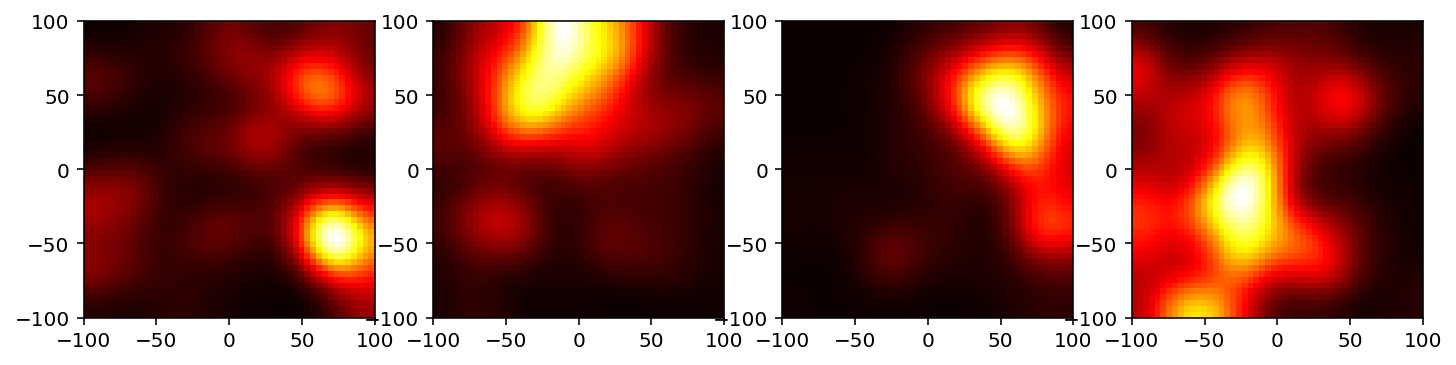

In [42]:
ctrl.get_fields(std=4)
ctrl.plot_fields(N=4, size=3)

In [41]:
ctrl.save('../spiketag/place_cell')

In [81]:
pwd

u'/disk0/Work/place_cells/n62/new_maze/replay_vr2/realtime'

In [695]:
ctrl.set_threshold(beta=8.0)

In [696]:
ctrl.set_transformer()

ERROR: Invoking <bound method maze_view.on_replay of <maze_view (PyQt5) at 0x7fc687c1e890>> repeat 1048576


In [33]:
import io

In [34]:
r32 = io.open('/dev/xillybus_fet_clf_32', 'rb')

In [35]:
r32.close()

### Check fet bin

In [7]:
%timeit fet = np.fromfile('./fet.bin', dtype=np.int32)

The slowest run took 5.57 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 66.5 ms per loop


In [11]:
fet = np.memmap('./fet.bin', dtype='int32', mode='r')

In [12]:
fet = fet.reshape(-1, 7)

In [13]:
fet_info = fet[:,:2]
fet_info

memmap([[     74,      10],
        [     74,       9],
        [    119,      10],
        ...,
        [2060330,      25],
        [2060422,      24],
        [2060464,      22]], dtype=int32)

In [14]:
unique, counts =  np.unique(fet_info[:,1], return_counts=True)

In [15]:
unique, counts

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29, 100], dtype=int32),
 array([1672,  783,  287,   79, 1470, 1475,  381,  242,  127, 7118, 6729,
         433,  372,  314,  104, 7022, 4875, 1017,  204, 1586, 1757, 1759,
         462,  117, 1044, 6421, 4696, 1133,  334,  309,    2]))

In [16]:
unique

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29, 100], dtype=int32)

In [17]:
counts

array([1672,  783,  287,   79, 1470, 1475,  381,  242,  127, 7118, 6729,
        433,  372,  314,  104, 7022, 4875, 1017,  204, 1586, 1757, 1759,
        462,  117, 1044, 6421, 4696, 1133,  334,  309,    2])

In [219]:
scv = np.zeros((128,))
scv

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
fet_val = fet[:,2:6]/float(2**16)

In [19]:
fet_val.shape

(54324, 4)

In [20]:
ctrl.current_group

0

In [21]:
idx4 = np.where(fet_info[:,1]==4)[0]

In [22]:
fet4 = fet_val[idx4, :]

In [23]:
fet4.shape

(1470, 4)

In [24]:
fet4

array([[-1.52587891e-05, -1.52587891e-05, -1.52587891e-05,
        -1.52587891e-05],
       [-1.52587891e-05, -1.52587891e-05, -1.52587891e-05,
        -1.52587891e-05],
       [-1.52587891e-05, -1.52587891e-05, -1.52587891e-05,
        -1.52587891e-05],
       ...,
       [-1.52587891e-05, -1.52587891e-05, -1.52587891e-05,
        -1.52587891e-05],
       [-1.52587891e-05, -1.52587891e-05, -1.52587891e-05,
        -1.52587891e-05],
       [-1.52587891e-05, -1.52587891e-05,  1.52587891e-05,
        -1.52587891e-05]])

In [25]:
from spiketag.view import scatter_3d_view

In [26]:
fet4_view = scatter_3d_view()

In [27]:
fet4_view.set_data(fet4)

In [28]:
fet4_view.show()

In [112]:
prb.chs[85]

95

In [113]:
prb.ch2g[95]

21

In [123]:
spk_info = np.fromfile('./spk.bin', dtype=np.int32)

In [124]:
spk_info = spk_info.reshape(-1,2)

In [125]:
spk_info.shape

(574591, 2)

In [132]:
spk_info

array([[      73,       51],
       [     155,       88],
       [     156,      108],
       ...,
       [18662106,       38],
       [18662106,       39],
       [18662121,       15]], dtype=int32)

In [59]:
r = ctrl.model.spk[ctrl.current_group]

In [60]:
x = r.transpose(0,2,1).ravel().reshape(-1, r.shape[1]*r.shape[2])
x.shape

(25511, 76)

In [61]:
fet = ctrl.model.fet[ctrl.current_group]
fet.shape

(25511, 6)

In [62]:
_pca_comp, _shift, _scale = ctrl.model.construct_transformer(ctrl.current_group, ndim=4)

In [63]:
_fet = ctrl._transform(x, _pca_comp, _shift, _scale)

In [64]:
_fet

array([[-0.03253421, -0.00044724,  0.04674998, -0.00541121],
       [-0.01755054,  0.00898474,  0.01596415, -0.02175856],
       [-0.06270456,  0.01975802,  0.02447153, -0.01954382],
       ...,
       [-0.01180097, -0.02364988, -0.00736066, -0.02704004],
       [-0.01263462, -0.05678098,  0.0049162 ,  0.02337401],
       [ 0.07794775, -0.03187289, -0.01280921, -0.00112119]],
      dtype=float32)

In [65]:
ctrl.view.fetview0.set_data(_fet, ctrl.model.clu[ctrl.current_group])

In [66]:
ctrl.view.fetview1.set_data(_fet, ctrl.model.clu[ctrl.current_group])

In [42]:
fet[:,:4]

array([[-0.03512409, -0.0036253 ,  0.04590067, -0.00755119],
       [-0.0206154 ,  0.00533302,  0.01324345, -0.02581174],
       [-0.06616818,  0.01806364,  0.02343487, -0.02222805],
       ...,
       [-0.0151239 , -0.0283965 , -0.01122396, -0.03150504],
       [-0.01495581, -0.061552  ,  0.00244207,  0.02171763],
       [ 0.07537872, -0.03960944, -0.01926894, -0.00750207]],
      dtype=float32)

In [67]:
_fet - fet[:,:4]

array([[0.00258988, 0.00317805, 0.00084931, 0.00213998],
       [0.00306485, 0.00365172, 0.0027207 , 0.00405318],
       [0.00346363, 0.00169439, 0.00103666, 0.00268424],
       ...,
       [0.00332292, 0.00474662, 0.0038633 , 0.004465  ],
       [0.00232119, 0.00477101, 0.00247413, 0.00165639],
       [0.00256903, 0.00773654, 0.00645973, 0.00638088]], dtype=float32)

In [68]:
print x.shape, _pca_comp.shape, _shift.shape, _scale.shape

(25511, 76) (76, 4) (4,) ()


In [7]:
from spiketag.fpga import xike_config

In [8]:
fpga = xike_config(prb)

In [9]:
fpga.ch_ugp

0:(0, 31, 34, 47)
1:(1, 8, 15, 51)
2:(2, 11, 55, 57)
3:(3, 5, 52, 59)
4:(4, 12, 13, 58)
5:(3, 5, 52, 59)
6:(6, 30, 49, 56)
7:(7, 24, 27, 40)
8:(1, 8, 15, 51)
9:(9, 25, 33, 61)
10:(10, 53, 54, 60)
11:(2, 11, 55, 57)
12:(4, 12, 13, 58)
13:(4, 12, 13, 58)
14:(14, 17, 22, 62)
15:(1, 8, 15, 51)
16:(16, 32, 41, 42)
17:(14, 17, 22, 62)
18:(18, 48, 50, 63)
19:(19, 21, 37, 39)
20:(20, 35, 36, 38)
21:(19, 21, 37, 39)
22:(14, 17, 22, 62)
23:(23, 28, 43, 46)
24:(7, 24, 27, 40)
25:(9, 25, 33, 61)
26:(26, 29, 44, 45)
27:(7, 24, 27, 40)
28:(23, 28, 43, 46)
29:(26, 29, 44, 45)
30:(6, 30, 49, 56)
31:(0, 31, 34, 47)
32:(16, 32, 41, 42)
33:(9, 25, 33, 61)
34:(0, 31, 34, 47)
35:(20, 35, 36, 38)
36:(20, 35, 36, 38)
37:(19, 21, 37, 39)
38:(20, 35, 36, 38)
39:(19, 21, 37, 39)
40:(7, 24, 27, 40)
41:(16, 32, 41, 42)
42:(16, 32, 41, 42)
43:(23, 28, 43, 46)
44:(26, 29, 44, 45)
45:(26, 29, 44, 45)
46:(23, 28, 43, 46)
47:(0, 31, 34, 47)
48:(18, 48, 50, 63)
49:(6, 30, 49, 56)
50:(18, 48, 50, 63)
51:(1, 8, 15, 51)
5

In [10]:
fpga.dc

offset of ch0 is 32.0
offset of ch1 is 32.0
offset of ch2 is 32.0
offset of ch3 is 32.0
offset of ch4 is 32.0
offset of ch5 is 32.0
offset of ch6 is 32.0
offset of ch7 is 32.0
offset of ch8 is 32.0
offset of ch9 is 32.0
offset of ch10 is 32.0
offset of ch11 is 32.0
offset of ch12 is 32.0
offset of ch13 is 32.0
offset of ch14 is 32.0
offset of ch15 is 32.0
offset of ch16 is 32.0
offset of ch17 is 32.0
offset of ch18 is 32.0
offset of ch19 is 32.0
offset of ch20 is 32.0
offset of ch21 is 32.0
offset of ch22 is 32.0
offset of ch23 is 32.0
offset of ch24 is 32.0
offset of ch25 is 32.0
offset of ch26 is 32.0
offset of ch27 is 32.0
offset of ch28 is 32.0
offset of ch29 is 32.0
offset of ch30 is 32.0
offset of ch31 is 32.0
offset of ch32 is 32.0
offset of ch33 is 32.0
offset of ch34 is 32.0
offset of ch35 is 32.0
offset of ch36 is 32.0
offset of ch37 is 32.0
offset of ch38 is 32.0
offset of ch39 is 32.0
offset of ch40 is 32.0
offset of ch41 is 32.0
offset of ch42 is 32.0
offset of ch43 is 32.

offset done

In [11]:
fpga.thres

threshold of ch0 is -115.004150391
threshold of ch1 is -196.133422852
threshold of ch2 is -36.8443603516
threshold of ch3 is -98.9520263672
threshold of ch4 is -185.519287109
threshold of ch5 is -5000.0
threshold of ch6 is -5000.0
threshold of ch7 is -219.455078125
threshold of ch8 is -178.537841797
threshold of ch9 is -132.86315918
threshold of ch10 is -94.4998779297
threshold of ch11 is -85.5638427734
threshold of ch12 is -185.719116211
threshold of ch13 is -53.2106933594
threshold of ch14 is -178.495849609
threshold of ch15 is -195.242919922
threshold of ch16 is -115.437011719
threshold of ch17 is -37.3656005859
threshold of ch18 is -189.515380859
threshold of ch19 is -195.493408203
threshold of ch20 is -44.3181152344
threshold of ch21 is -213.478393555
threshold of ch22 is -269.251831055
threshold of ch23 is -60.3253173828
threshold of ch24 is -64.7889404297
threshold of ch25 is -175.49597168
threshold of ch26 is -86.7989501953
threshold of ch27 is -169.145751953
threshold of ch28 

threshold enable status: False

In [14]:
prb.bad_chs = prb.chs[[1,3]]
for ch in prb.mask_chs:
    fpga.thres[ch] = -5000.
for ch in prb.bad_chs:
    fpga.thres[ch] = -5000.

In [74]:
fpga._config_FPGA_transformer(grpNo=ctrl.current_group,
                              P=_pca_comp, b=_shift, a=_scale)

In [13]:
fpga.pca[4]

array([[ 0.0234375, -0.1328125,  0.1171875,  0.0703125],
       [ 0.015625 , -0.15625  ,  0.125    ,  0.0859375],
       [ 0.       , -0.171875 ,  0.125    ,  0.0859375],
       [-0.0234375, -0.1796875,  0.109375 ,  0.078125 ],
       [-0.0546875, -0.1796875,  0.078125 ,  0.0546875],
       [-0.0859375, -0.171875 ,  0.0390625,  0.0234375],
       [-0.1171875, -0.1484375,  0.       , -0.015625 ],
       [-0.140625 , -0.1171875, -0.03125  , -0.046875 ],
       [-0.15625  , -0.0859375, -0.0546875, -0.0703125],
       [-0.1640625, -0.0546875, -0.0546875, -0.0703125],
       [-0.1640625, -0.0234375, -0.046875 , -0.0546875],
       [-0.15625  ,  0.       , -0.03125  , -0.0234375],
       [-0.1484375,  0.0234375, -0.015625 ,  0.015625 ],
       [-0.140625 ,  0.046875 ,  0.       ,  0.0546875],
       [-0.125    ,  0.0703125,  0.0078125,  0.0859375],
       [-0.109375 ,  0.0859375,  0.0078125,  0.1171875],
       [-0.09375  ,  0.1015625,  0.       ,  0.140625 ],
       [-0.078125 ,  0.109375 ,

In [19]:
for i in ctrl.model.groups:
    _pca_comp, _shift, _scale = ctrl.construct_transformer(group_id=i, ndim=4)
    fpga._config_FPGA_transformer(grpNo=i, P=_pca_comp, b=_shift, a=_scale)
    print i,
    print np.allclose(fpga.pca[i], _pca_comp, atol=1e-3),
    print np.allclose(fpga.shift[i], _shift,  atol=1e-3),
    print np.allclose(fpga.scale[i], _scale,  atol=1e-3)

 0 True True True
1 True True True
2 True True True
3 True True True
4 True True True
5 True True True
6 True True True
7 True True True
8 True True True
9 True True True
10 True True True
11 True True True
12 True True True
13 True True True
14 True True True
15 True True True
16 True True True
17 True True True
18 True True True
19 True True True
20 True True True
21 True True True
22 True True True
23 True True True
24 True True True
25 True True True
26 True True True
27 True True True
28 True True True
29 True True True


In [42]:
fet_val

array([[ 1.21798706, -0.58540344, -0.02676392,  0.08744812],
       [ 1.23342896, -0.57601929, -0.04270935,  0.08161926],
       [ 1.22370911, -0.57911682, -0.04156494,  0.08332825],
       ...,
       [-0.02671814,  0.02627563, -0.05752563, -0.00468445],
       [-0.01757812,  0.04084778, -0.04211426,  0.03887939],
       [-0.03106689, -0.00866699, -0.05551147, -0.04006958]])

In [49]:
fet[:100]

array([[    53,      0,  79822, -38365,  -1754,   5731,      0],
       [    53,      0,  80834, -37750,  -2799,   5349,      0],
       [    53,      0,  80197, -37953,  -2724,   5461,      0],
       [    53,      0,  79888, -38114,  -1600,   4927,      0],
       [    53,      0,  80281, -38511,  -2324,   5553,      0],
       [    53,      0,  80399, -38265,  -1598,   5983,      0],
       [    53,      0,  79120, -37270,  -2037,   4881,      0],
       [    53,      0,  79517, -37696,  -1912,   5866,      0],
       [    53,      0,  79439, -37384,  -3050,   6868,      0],
       [    53,      0,  79563, -38071,  -1113,   5622,      0],
       [    53,      0,  78745, -38359,  -2347,   5707,      0],
       [    53,      0,  79281, -38727,  -1377,   5782,      0],
       [    53,      0,  80200, -38991,  -2115,   6475,      0],
       [    53,      0,  80361, -37243,  -2288,   6055,      0],
       [    53,      0,  78135, -36950,  -1315,   5868,      0],
       [    61,      0,  

In [48]:
spk_info[:100]

array([[  53,    2],
       [  53,    3],
       [  53,   10],
       [  53,   43],
       [  53,   13],
       [  53,   16],
       [  53,   18],
       [  53,   51],
       [  53,   20],
       [  53,   21],
       [  53,   24],
       [  53,   25],
       [  53,   29],
       [  53,   62],
       [  53,   31],
       [  61,    0],
       [  61,    2],
       [  61,   39],
       [  61,    8],
       [  61,   41],
       [  61,   10],
       [  61,   13],
       [  61,   14],
       [  61,   18],
       [  61,   20],
       [  61,   23],
       [  61,   24],
       [  61,   26],
       [  61,   61],
       [  77,   79],
       [  78,  127],
       [ 123,   84],
       [ 348,   63],
       [ 353,   51],
       [ 356,   34],
       [ 359,   50],
       [ 359,   51],
       [ 364,   38],
       [ 364,   39],
       [ 410,   52],
       [ 410,   54],
       [ 416,   62],
       [ 553,  111],
       [ 575,   38],
       [ 575,   39],
       [ 651,   15],
       [ 651,   63],
       [ 660,

In [81]:
from spiketag.fpga import bram_thres, offset

In [82]:
chgpNo = bram_thres.chgpNo(nCh=160)

In [83]:
chgpNo

chgpNo of ch0 is 0.0
chgpNo of ch1 is 0.0
chgpNo of ch2 is 0.0
chgpNo of ch3 is 0.0
chgpNo of ch4 is 0.0
chgpNo of ch5 is 0.0
chgpNo of ch6 is 0.0
chgpNo of ch7 is 0.0
chgpNo of ch8 is 0.0
chgpNo of ch9 is 0.0
chgpNo of ch10 is 0.0
chgpNo of ch11 is 0.0
chgpNo of ch12 is 0.0
chgpNo of ch13 is 0.0
chgpNo of ch14 is 0.0
chgpNo of ch15 is 0.0
chgpNo of ch16 is 0.0
chgpNo of ch17 is 0.0
chgpNo of ch18 is 0.0
chgpNo of ch19 is 0.0
chgpNo of ch20 is 0.0
chgpNo of ch21 is 0.0
chgpNo of ch22 is 0.0
chgpNo of ch23 is 0.0
chgpNo of ch24 is 0.0
chgpNo of ch25 is 0.0
chgpNo of ch26 is 0.0
chgpNo of ch27 is 0.0
chgpNo of ch28 is 0.0
chgpNo of ch29 is 0.0
chgpNo of ch30 is 0.0
chgpNo of ch31 is 0.0
chgpNo of ch32 is 0.0
chgpNo of ch33 is 0.0
chgpNo of ch34 is 0.0
chgpNo of ch35 is 0.0
chgpNo of ch36 is 0.0
chgpNo of ch37 is 0.0
chgpNo of ch38 is 0.0
chgpNo of ch39 is 0.0
chgpNo of ch40 is 0.0
chgpNo of ch41 is 0.0
chgpNo of ch42 is 0.0
chgpNo of ch43 is 0.0
chgpNo of ch44 is 0.0
chgpNo of ch45 is 0.

chgpNo done

In [84]:
for i in range(160):
    try:
        chgpNo[i] = prb.ch2g[i]
    except:
        chgpNo[i] = 100

In [85]:
chgpNo

chgpNo of ch0 is 6.0
chgpNo of ch1 is 4.0
chgpNo of ch2 is 3.0
chgpNo of ch3 is 0.0
chgpNo of ch4 is 2.0
chgpNo of ch5 is 0.0
chgpNo of ch6 is 100.0
chgpNo of ch7 is 12.0
chgpNo of ch8 is 4.0
chgpNo of ch9 is 7.0
chgpNo of ch10 is 1.0
chgpNo of ch11 is 3.0
chgpNo of ch12 is 2.0
chgpNo of ch13 is 2.0
chgpNo of ch14 is 8.0
chgpNo of ch15 is 4.0
chgpNo of ch16 is 13.0
chgpNo of ch17 is 8.0
chgpNo of ch18 is 5.0
chgpNo of ch19 is 9.0
chgpNo of ch20 is 10.0
chgpNo of ch21 is 9.0
chgpNo of ch22 is 8.0
chgpNo of ch23 is 14.0
chgpNo of ch24 is 12.0
chgpNo of ch25 is 7.0
chgpNo of ch26 is 11.0
chgpNo of ch27 is 12.0
chgpNo of ch28 is 14.0
chgpNo of ch29 is 11.0
chgpNo of ch30 is 100.0
chgpNo of ch31 is 6.0
chgpNo of ch32 is 13.0
chgpNo of ch33 is 7.0
chgpNo of ch34 is 6.0
chgpNo of ch35 is 10.0
chgpNo of ch36 is 10.0
chgpNo of ch37 is 9.0
chgpNo of ch38 is 10.0
chgpNo of ch39 is 9.0
chgpNo of ch40 is 12.0
chgpNo of ch41 is 13.0
chgpNo of ch42 is 13.0
chgpNo of ch43 is 14.0
chgpNo of ch44 is 11.

chgpNo done

In [78]:
prb.chs

array([  3,   5,  52,  59,  10,  53,  54,  60,   4,  12,  13,  58,   2,
        11,  55,  57,   1,   8,  15,  51,  18,  48,  50,  63,   0,  31,
        34,  47,   9,  25,  33,  61,  14,  17,  22,  62,  19,  21,  37,
        39,  20,  35,  36,  38,  26,  29,  44,  45,   7,  24,  27,  40,
        16,  32,  41,  42,  23,  28,  43,  46,  67,  69, 116, 123,  74,
       117, 118, 124,  68,  76,  77, 122,  66,  75, 119, 121,  65,  72,
        79, 115,  82, 112, 114, 127,  64,  95,  98, 111,  73,  89,  97,
       125,  78,  81,  86, 126,  83,  85, 101, 103,  84,  99, 100, 102,
        90,  93, 108, 109,  71,  88,  91, 104,  80,  96, 105, 106,  87,
        92, 107, 110])